<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/tensorflow_withdl/tensorflow_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOGISTIC REGRESSION WITH TENSORFLOW
---

Diffrence between Linear Regresison and Logistic Regression ??
---
* Logistic Regression - for classification (Binary)
* Linear Regresion - for Regression (contnious Vlaues )
* Logistic rgression i s variation of a model  when dependtent variable is categorical
* Lgistic Regression -probalistic clasification model
* fits a special s shaped curve by taking the linear regression and transofrming  the numeric estimate into a probality with  the function below

$$
ProbabilityOfaClass = \theta(y) = \frac{e^y}{1 + e^y} = exp(y) / (1 + exp(y)) = p
$$

* produce p values between o and 1
*theta(y) logistic function also alled logistic curve  common S shaped sigmoid curve

Utlizing Logistic Regression in Tensorflow
---

STEP1-IMPORT LIBRARIES AAND DATASET
---

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split



In [3]:
# loading the dataset an understanding the dataset
iris = load_iris()
iris_X, iris_y = iris.data[:-1,:], iris.target[:-1]   # iris.data:4 feature per flower
iris_y= pd.get_dummies(iris_y).values
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33, random_state=42)

🔹 Step 2: Prepare Features and Labels
---

Step 3: Define Dimensions
---

In [4]:
# numFeatures is the number of features in our input data.
# In the iris dataset, this number is '4'.
numFeatures = trainX.shape[1]
print('numFeatures is : ', numFeatures )
# numLabels is the number of classes our data points can be in.
# In the iris dataset, this number is '3'.
numLabels = trainY.shape[1]
print('numLabels is : ', numLabels )

#X = tf.Variable( np.identity(numFeatures), tf.TensorShape(numFeatures),dtype='float32') # Iris has 4 features, so X is a tensor to hold our data.
#yGold = tf.Variable(np.array([1,1,1]),shape=tf.TensorShape(numLabels),dtype='float32') # This will be our correct answers matrix for 3 classes.

numFeatures is :  4
numLabels is :  3


Define the shape of weights and biases based on input and output sizes.



Step 4: Convert Data to TensorFlow Tensors
---

In [5]:
trainX = tf.constant(trainX, dtype='float32')
trainY = tf.constant(trainY, dtype='float32')
testX = tf.constant(testX, dtype='float32')
testY = tf.constant(testY, dtype='float32')


Purpose: Make all inputs TensorFlow-compatible.

Step 5: Initialize Weights and Biases
---

In [6]:
W = tf.Variable(tf.zeros([4, 3]))  # 4-dimensional input and  3 classes
b = tf.Variable(tf.zeros([3])) # 3-dimensional output [0,0,1],[0,1,0],[1,0,0]

✅ Purpose:

weights: shape (4, 3)

bias: shape (3,)

In [7]:
#Randomly sample from a normal distribution with standard deviation .01

weights = tf.Variable(tf.random.normal([numFeatures,numLabels],
                                       mean=0.,
                                       stddev=0.01,
                                       name="weights"),dtype='float32')


bias = tf.Variable(tf.random.normal([1,numLabels],
                                    mean=0.,
                                    stddev=0.01,
                                    name="bias"))


 Step 6: Define Forward Pass (Logistic Regression Model)
 ---

Purpose: Apply W·X + b followed by softmax for multiclass output.

In [17]:
def logistic_regression(x):
    apply_weights_OP = tf.matmul(x, weights, name="apply_weights")
    add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias")
    activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")
    return activation_OP

In [29]:
numEpochs=700
# defining our learning rate iterations
lr=tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.05,decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

 Step 7: Define Loss Function & Optimizer
 ---

In [30]:
# defining our cost function squared mean error
loss_obj=tf.keras.losses.MeanSquaredLogarithmicError()
optimizer=tf.keras.optimizers.SGD(lr)

 Purpose:

Loss: Categorical cross-entropy for multiclass

Optimizer: SGD with exponential learning rate decay

Step 8: Define Accuracy Metric
---

In [31]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Step 9: Define Optimization Step
---

In [32]:
# Optimization process.

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = loss_obj(pred, y)
    gradients = g.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

 ✅ Purpose:

Forward pass, calculate loss

Compute gradients using GradientTape

Update weights and biases

🔹 Step 10: Train the Model
---

In [33]:
# Initialize reporting variables
display_step = 10
epoch_values = []
accuracy_values = []
loss_values = []
loss = 0
diff = 1
# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in loss %g; convergence."%diff)
        break
    else:
        # Run training step
        run_optimization(trainX, trainY)

        # Report occasional stats
        if i % display_step == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)

            pred = logistic_regression(testX)

            newLoss = loss_obj(pred, testY)
            # Add loss to live graphing variable
            loss_values.append(newLoss)

            # Generate accuracy stats on test data
            acc = accuracy(pred, testY)
            accuracy_values.append(acc)


            # Re-assign values for variables
            diff = abs(newLoss - loss)
            loss = newLoss

            #generate print statements
            print("step %d, training accuracy %g, loss %g, change in loss %g"%(i, acc, newLoss, diff))





# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())




step 0, training accuracy 0.32, loss 0.106814, change in loss 0.106814
step 10, training accuracy 0.32, loss 0.102903, change in loss 0.00391123
step 20, training accuracy 0.34, loss 0.100569, change in loss 0.0023334
step 30, training accuracy 0.6, loss 0.0987066, change in loss 0.00186256
step 40, training accuracy 0.7, loss 0.0970145, change in loss 0.00169212
step 50, training accuracy 0.7, loss 0.0954052, change in loss 0.00160923
step 60, training accuracy 0.7, loss 0.0938535, change in loss 0.00155168
step 70, training accuracy 0.7, loss 0.0923531, change in loss 0.00150049
step 80, training accuracy 0.7, loss 0.0909028, change in loss 0.00145029
step 90, training accuracy 0.7, loss 0.0895028, change in loss 0.00139995
step 100, training accuracy 0.7, loss 0.0881666, change in loss 0.00133625
step 110, training accuracy 0.7, loss 0.0869305, change in loss 0.00123608
step 120, training accuracy 0.7, loss 0.085739, change in loss 0.00119153
step 130, training accuracy 0.7, loss 0.

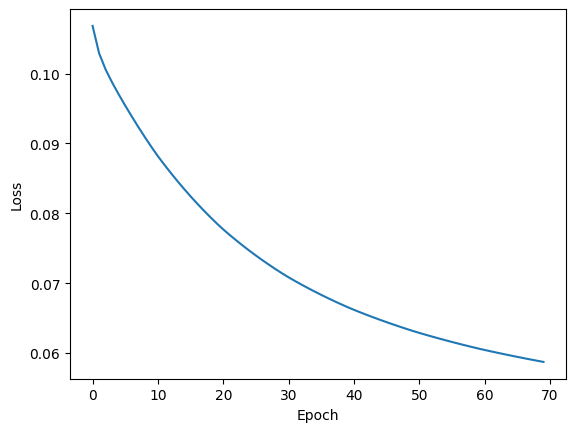

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()

Text Here accuracy is low
---
problem ???
1. using wrong loss function
2.wrong activation function
3.Label one hot encoding on truncated datset
4.Learning too low


 Summary of Fixes:
 ---
✅ Replace MeanSquaredLogarithmicError() → CategoricalCrossentropy(from_logits=False)

✅ Replace sigmoid → softmax in activation

✅ Use full dataset iris.data, iris.target

✅ Use better learning rate: 0.05

✅ Bias shape → [numLabels] not [1, numLabels]

✅ Monitor both train and test accuracy



In [35]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33)

model = LogisticRegression(max_iter=200)  # supports multiclass by default (one-vs-rest or multinomial)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))


Accuracy: 0.94


In [36]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load data
iris = load_iris()
X, y = iris.data, iris.target.reshape(-1, 1)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Initialize weights and bias
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
W = np.random.randn(num_features, num_classes) * 0.01
b = np.zeros((1, num_classes))

# Softmax
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy(y_pred, y_true):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))

# Training loop
lr = 0.1
epochs = 500

for epoch in range(epochs):
    z = np.dot(X_train, W) + b
    y_pred = softmax(z)

    loss = cross_entropy(y_pred, y_train)

    # Backprop
    dz = y_pred - y_train
    dW = np.dot(X_train.T, dz) / X_train.shape[0]
    db = np.sum(dz, axis=0, keepdims=True) / X_train.shape[0]

    # Update
    W -= lr * dW
    b -= lr * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test accuracy
test_preds = softmax(np.dot(X_test, W) + b)
acc = np.mean(np.argmax(test_preds, axis=1) == np.argmax(y_test, axis=1))
print("Test Accuracy:", acc)


Epoch 0, Loss: 1.0991
Epoch 50, Loss: 0.6322
Epoch 100, Loss: 0.4856
Epoch 150, Loss: 0.3601
Epoch 200, Loss: 0.2738
Epoch 250, Loss: 0.2478
Epoch 300, Loss: 0.2290
Epoch 350, Loss: 0.2139
Epoch 400, Loss: 0.2016
Epoch 450, Loss: 0.1912
Test Accuracy: 1.0
